# David Foote - HW 2
## Answers

Import needed libraries:

In [81]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import requests
import dfoote_struct_est_lib as dstruct
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


More setting up:

In [2]:
claims = np.loadtxt('clms.txt')

## 1. Health claim amounts and the GB family of distributions (5)


a) Calculate and report the mean, median, maximum, minimum, and standard deviation of monthly health expenditures for these data. Plot two histograms of the data in which the y-axis gives the percent of observations in the particular bin of health expenditures and the x-axis gives the value of monthly health expenditures. Use percentage histograms in which the height of each bar is the percent of observations in that bin (see instructions in Jupyter notebook PythonVisualize.ipynb in Section 1.2). In the first histogram, use 1,000 bins to plot the frequency of all the data. In the second histogram, use 100 bins to plot the frequency of only monthly health expenditures less-than-or-equal-to $800 (xi ≤ 800). Adjust the frequencies of this second histogram to account for the observations that you have not displayed (xi > 800). That is, the heights of the histogram bars in the second histogram should not sum to 1 because you are only displaying a fraction of the data. Comparing the two histograms, why might you prefer the second one?

In [3]:
type(claims)

numpy.ndarray

In [4]:
mnts = dstruct.summarize_column(claims)

mean  :  720.2779753272437
med  :  172.21
max  :  227967.25
min  :  0.01
std  :  3972.663756393663


0.0025487609345454286


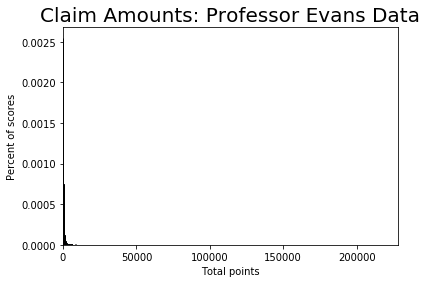

In [5]:
dstruct.histogram(claims, 1000, 'Claim Amounts: Professor Evans Data', 'Total points',
                  'Percent of scores', [0, mnts['max']])

In [6]:
sm_claims = claims[claims <= 800]

In [7]:
sm_mnts = dstruct.summarize_column(sm_claims)

mean  :  199.3079312638581
med  :  137.26
max  :  799.61
min  :  0.01
std  :  182.83484556989498


0.03842169695828191


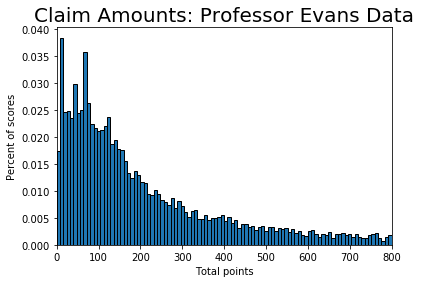

In [8]:
dstruct.histogram(sm_claims, 100, 'Claim Amounts: Professor Evans Data', 'Total points',
                  'Percent of scores', [0, sm_mnts['max']], claims)

*I would prefer to use the second distribution since it provides a better perspective on the shape of the majority of the data*

b) (1 point) Using MLE, fit the gamma GA(x;α,β) distribution to the in-
dividual observation data. Use β0 = V ar(x)/E(x) and α0 = E(x)/β0 as
your initial guess.1 Report your estimated values for αˆ and βˆ, as well as ˆ
the value of the maximized log likelihood function lnL(θ). Plot the sec- ond histogram from part (a) overlayed with a line representing the implied histogram from your estimated gamma (GA) distribution.

In [32]:
gamma_init_params = dstruct.gamma_firstguess(sm_mnts)
gamma_init_params

SHAPE:  1.188314028535338
RATE:  167.7232839786601


(1.188314028535338, 167.7232839786601)

0.03842169695828191


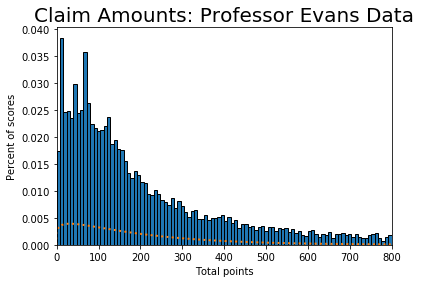

In [27]:
dstruct.histogram(sm_claims, 100, 'Claim Amounts: Professor Evans Data', 'Total points',
                  'Percent of scores', [0, sm_mnts['max']], claims)
x = np.linspace(0,800, 1000)
plt.plot(x, dstruct.make_gamma_pdf(x, gamma_init_params[0], gamma_init_params[1]), linewidth=2,
         ls='dotted', label='Estimated GA dist\'n')

**Above we see my initial guess displayed over the data from our smaller claims array**  
*Below we will use MLE to find a better fit for this line*

In [33]:
alpha_mle, beta_mle = dstruct.mle(gamma_init_params, dstruct.gamma_crit, sm_claims)

0.005656930460795807


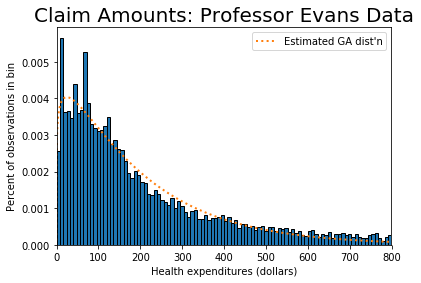

In [52]:
n = dstruct.histogram(sm_claims, 100, 'Claim Amounts: Professor Evans Data', 'Total points',
                  'Percent of scores', [0, sm_mnts['max']], claims)
x = np.linspace(0,800, 1000)
plt.plot(x, dstruct.make_gamma_pdf(x, alpha_mle, beta_mle), linewidth=2,
         ls='dotted', label='Estimated GA dist\'n')
plt.xlabel(r'Health expenditures (dollars)')
plt.ylabel(r'Percent of observations in bin')
plt.legend(loc='upper right')

In [53]:
print('maximized log likelihood function lnL(θ)=',
      dstruct.log_lik(sm_claims, (alpha_mle, beta_mle), dstruct.make_gamma_pdf))

maximized log likelihood function lnL(θ)= -56732.59867955956


*and behold -  a better fitting gamma distribution (technically the best fitting gamma distribution)*

c) (1 point) Using MLE, fit the generalized gamma GG(x; α, β, m) distribu- tion to the individual observation data. Use your estimates for α and β from part(b), as well as m = 1, as your initial guess. Report your estimated values for αˆ, βˆ, and mˆ , as well as the value of the maximized log likelihood function ln L. Plot the second histogram from part (a) overlayed with a line representing the implied histogram from your estimated generalized gamma (GG) distribution.

In [54]:
gen_gamma_guess = dstruct.gengamma_firstguess(sm_mnts, sm_claims)

SHAPE:  1.188314028535338
RATE:  167.7232839786601


In [55]:
alpha, beta, m = dstruct.mle3(gen_gamma_guess, dstruct.gengamma_crit, sm_claims)
print('ALPHA suggested by MLE: ', alpha)
print('BETA suggested by MLE: ', beta)
print('M suggested by MLE: ', m)

ALPHA suggested by MLE:  1.2377600979154195
BETA suggested by MLE:  156.16333464724275
M suggested by MLE:  0.9497407770033459


In [56]:
print('maximized log likelihood function lnL(θ)=',
      dstruct.log_lik(sm_claims, (alpha, beta, m), dstruct.make_gengamma_pdf))

maximized log likelihood function lnL(θ)= -56731.8316743951


*This is a better log likelihood*

0.005656930460795807


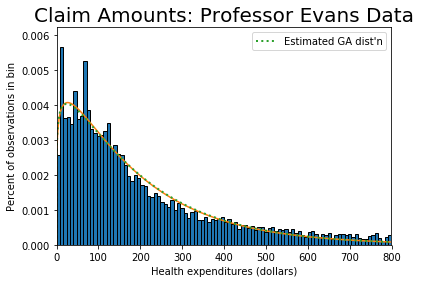

In [57]:
n = dstruct.histogram(sm_claims, 100, 'Claim Amounts: Professor Evans Data', 'Total points',
                  'Percent of scores', [0, sm_mnts['max']], claims)
x = np.linspace(0,800, 9020)
plt.plot(x, dstruct.make_gengamma_pdf(x, alpha, beta, m))
plt.plot(x, dstruct.make_gamma_pdf(x, alpha_mle, beta_mle), linewidth=2,
         ls='dotted', label='Estimated GA dist\'n')
plt.ylim(0, 1.1 * n.max())
plt.xlabel(r'Health expenditures (dollars)')
plt.ylabel(r'Percent of observations in bin')
plt.legend(loc='upper right')

(d) (1 point) Using MLE, fit the generalized beta 2 GB2(x; a, b, p, q) distribu- tion to the individual observation data. Use your estimates for α, β, and m from part (c), as well as q = 10, 000, as your initial guess. Report your estimated values for aˆ, ˆb, pˆ, and qˆ, as well as the value of the maximized log likelihood function ln L. Plot the second histogram from part(a) over- layed with a line representing the implied histogram from your estimated generalized beta 2 (GB2) distribution.

In [224]:
first_guess = dstruct.gb2_firstguess((alpha, beta, m, 10000))
print(alpha,
beta,
m)
first_guess

1.2377600979154195 156.16333464724275 0.9497407770033459


(0.9497407770033459, 16280.792460488197, 1.3032609822449046, 10000)

In [226]:
gb2_mle_params = dstruct.mle4(first_guess, dstruct.gb2_crit, claims)
gb2_mle_params

      fun: inf
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([nan, nan, nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([9.49740777e-01, 1.62807925e+04, 1.30326098e+00, 1.00000000e+04])


(0.9497407770033459, 16280.792460488197, 1.3032609822449046, 10000.0)

0.005656930460795807


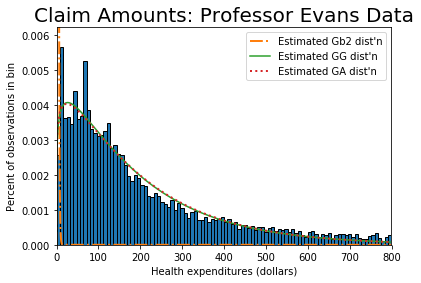

In [227]:
n = dstruct.histogram(sm_claims, 100, 'Claim Amounts: Professor Evans Data', 'Total points',
                  'Percent of scores', [0, sm_mnts['max']], claims)
x = np.linspace(0,800, 9020)
y=dstruct.GB2_pdf(x, gb2_mle_params[0],gb2_mle_params[1],gb2_mle_params[2],gb2_mle_params[3])
plt.plot(x, y, linewidth=2, ls='-.', label='Estimated Gb2 dist\'n')
plt.plot(x, dstruct.make_gengamma_pdf(x, alpha, beta, m), label='Estimated GG dist\'n')
plt.plot(x, dstruct.make_gamma_pdf(x, alpha_mle, beta_mle), linewidth=2,
         ls='dotted', label='Estimated GA dist\'n')
plt.ylim(0, 1.1 * n.max())
plt.xlabel(r'Health expenditures (dollars)')
plt.ylabel(r'Percent of observations in bin')
plt.legend(loc='upper right')

In [228]:
dstruct.GB2_pdf(x, first_guess[0], first_guess[1], first_guess[2], first_guess[3])

array([4.43843033e-003, 5.38486414e-001, 5.78378353e-001, ...,
       1.89134688e-241, 1.78667878e-241, 1.68780415e-241])

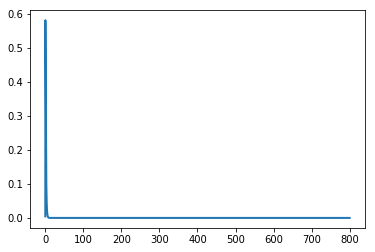

In [218]:
plt.plot(x, dstruct.GB2_pdf(x, first_guess[0], first_guess[1], first_guess[2], first_guess[3]), linewidth=2, ls='-', label='Estimated Gb2 dist\'n')

I have no idea why this distribution does not look right

In [231]:
print('maximized log likelihood function lnL(θ)=',
      dstruct.log_lik(sm_claims, gb2_mle_params, dstruct.GB2_pdf))

maximized log likelihood function lnL(θ)= -1324422.1960973255


Likelihood Ratio Tests

In [239]:
#gamma
log_lik_h0 = dstruct.log_lik(sm_claims, gamma_init_params, dstruct.make_gamma_pdf)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = dstruct.log_lik(sm_claims, (alpha_mle, beta_mle), dstruct.make_gamma_pdf)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)


hypothesis value log likelihood -56737.60574537667
MLE log likelihood -56732.59867955956
likelihood ratio value 10.014131634219666
chi squared of H0 with 2 degrees of freedom p-value =  0.00669050570104035


In [ ]:
#gengamma
log_lik_h0 = dstruct.log_lik(sm_claims, gamma_init_params, dstruct.make_gengamma_pdf)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = dstruct.log_lik(sm_claims, (alpha_mle, beta_mle), dstruct.make_gengamma_pdf)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)